## installing mysql connector

In [ ]:
pip install --upgrade mysql-connector-python

In [29]:
import mysql.connector 
from mysql.connector import Error
import pandas as pd
import seaborn as sns

## Using the database connection to connect to my sql workbench 

In [30]:
def database_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
        host = host_name,
        user = user_name,
        passwd = user_password,
        db = db_name)
        print('MySQL Database Connection Successful...')
    except Error as err:
        print(f"Error: {err}")
    return connection

## Running the database connection with my sql password and localhost

In [31]:
db_connect = database_connection('127.0.0.1','root','bellarmine1234', 'sakila')

MySQL Database Connection Successful...


## Printing the categories for each film type

In [32]:
import warnings
warnings.filterwarnings('ignore')

query = 'select name as "category", count(film_category.category_id) as "num_category" from film_category inner join category on film_category.category_id = category.category_id group by name order by count(film_category.category_id) desc;'
database = pd.read_sql(query, db_connect)
print(database)

       category  num_category
0        Sports            74
1       Foreign            73
2        Family            69
3   Documentary            68
4     Animation            66
5        Action            64
6           New            63
7         Drama            62
8         Games            61
9        Sci-Fi            61
10     Children            60
11       Comedy            58
12     Classics            57
13       Travel            57
14       Horror            56
15        Music            51


## Horizontal bar chart for number of films by category 

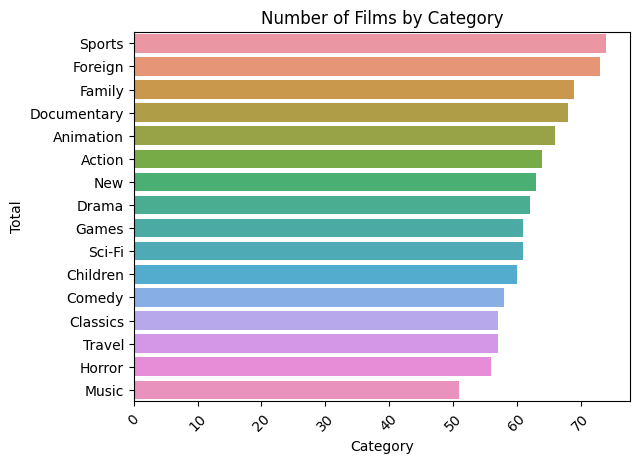

In [33]:
import matplotlib.pyplot as plt
query = "select name as 'category', count(film_category.category_id) as 'num_films' from film_category inner join category on film_category.category_id = category.category_id group by name order by count(film_category.category_id) desc;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_films', y = 'category', data = database, orient = 'h')
plt.title('Number of Films by Category')
plt.xlabel('Category')
plt.ylabel('Total')

plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

plt.show()

## Horizontal bar chart for Top 10 countries by city count

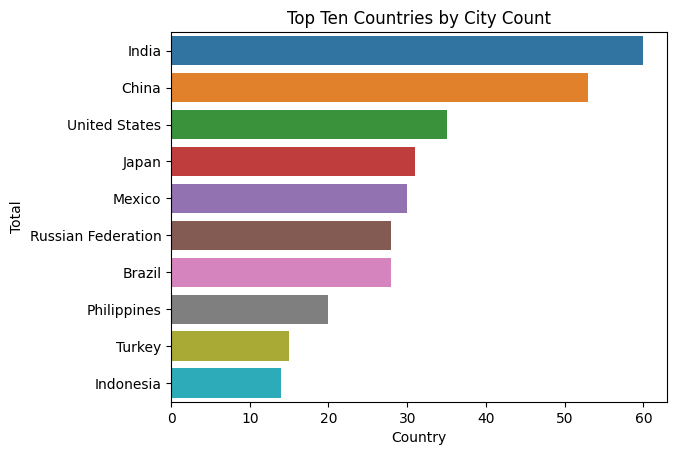

In [24]:
query = "select country, count(city) as 'num_cities'from city, country where city.country_id = country.country_id group by country order by count(city) desc limit 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_cities', y = 'country', data = database, orient='h')
plt.title('Top Ten Countries by City Count')
plt.xlabel('Country')
plt.ylabel('Total')



plt.show()

## Horizontal bar chart for Top 10 movies by actor counts

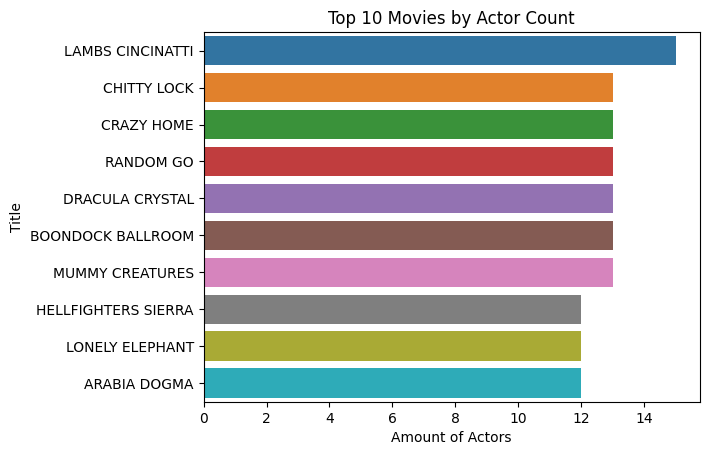

In [26]:
query = "select title, count(actor_id) as 'num_actors' from film inner join film_actor on film_actor.film_id = film.film_id group by title order by count(actor_id) desc limit 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'num_actors', y = 'title', data = database, orient='h')
plt.title('Top 10 Movies by Actor Count')
plt.xlabel('Amount of Actors')
plt.ylabel('Title')



plt.show()

## Horizontal bar chart for Top 10 countries by movies rented 

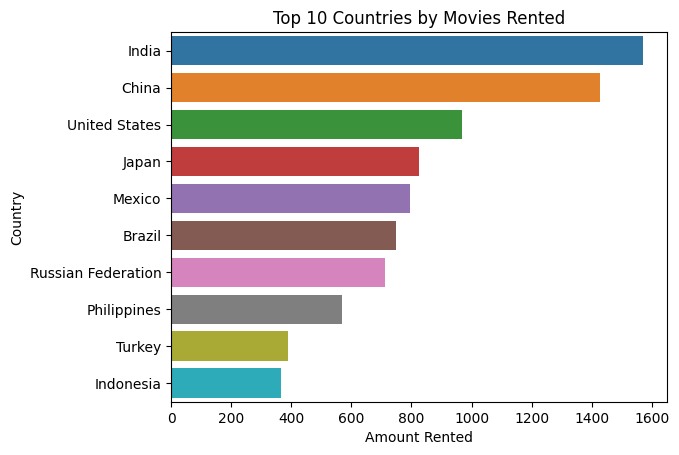

In [41]:
query = "SELECT country, COUNT(rental.rental_id) as total_rentals FROM country INNER JOIN city ON country.country_id = city.country_id INNER JOIN address ON city.city_id = address.city_id INNER JOIN customer ON address.address_id = customer.address_id INNER JOIN rental ON customer.customer_id = rental.customer_id GROUP BY country ORDER BY total_rentals DESC LIMIT 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'total_rentals', y = 'country', data = database, orient='h')
plt.title('Top 10 Countries by Movies Rented')
plt.xlabel('Amount Rented')
plt.ylabel('Country')



plt.show()

## Horizontal chart for Top 10 countries by customer revenue 

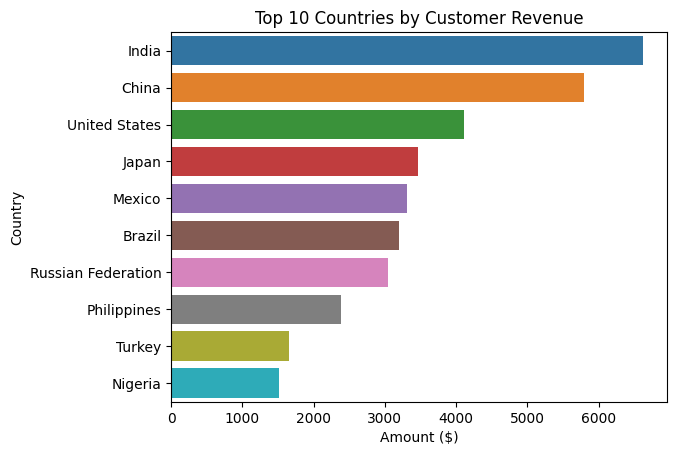

In [36]:
query = "SELECT country, SUM(payment.amount) AS total_amount FROM payment INNER JOIN customer ON payment.customer_id = customer.customer_id INNER JOIN address ON customer.address_id = address.address_id INNER JOIN city ON address.city_id = city.city_id INNER JOIN country ON city.country_id = country.country_id GROUP BY country ORDER BY SUM(payment.amount) DESC LIMIT 10;"
database = pd.read_sql(query, db_connect)

plot = sns.barplot(x = 'total_amount', y = 'country', data = database, orient='h')
plt.title('Top 10 Countries by Customer Revenue')
plt.xlabel('Amount ($)')
plt.ylabel('Country')



plt.show()

## Scatter plot displaying number of rentals vs amount of money spent

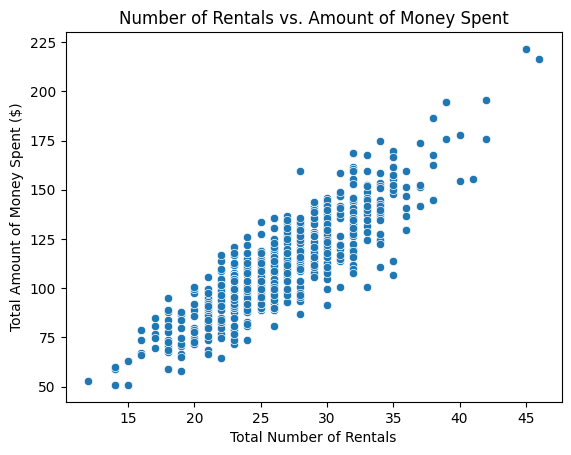

In [44]:
query ="SELECT count(payment.rental_id) as 'amount_rented', SUM(payment.amount) as 'amount_spent' FROM PAYMENT GROUP BY customer_id;"
database = pd.read_sql(query, db_connect)
sns.scatterplot(data=database, x='amount_rented', y='amount_spent')

plt.title('Number of Rentals vs. Amount of Money Spent')
plt.xlabel('Total Number of Rentals')
plt.ylabel('Total Amount of Money Spent ($)')

plt.show()

## Linear regression  results 

In [46]:
query ="SELECT count(payment.rental_id) as 'amount_rented', SUM(payment.amount) as 'amount_spent' FROM PAYMENT GROUP BY customer_id;"
database = pd.read_sql(query, db_connect)

import pandas as pd
import statsmodels.api as sm

X = sm.add_constant(database['amount_rented'])  
y = database['amount_spent']  

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           amount_spent   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1871.
Date:                Tue, 26 Mar 2024   Prob (F-statistic):          4.10e-186
Time:                        11:46:42   Log-Likelihood:                -2361.2
No. Observations:                 599   AIC:                             4726.
Df Residuals:                     597   BIC:                             4735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.2217      2.725     -1.182